In [ ]:
import pandas as pd
import numpy as np

# **Create Class of LinearRegression**

In [ ]:
class LinearRegression1:

  def __init__(self, lr=0.001, n_iters=1000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None

  def fit(self,X,y):
    #init parameters
    n_samples,n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      #update for each features, careful here
      dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
      db = (1/n_samples) * np.sum(y_pred-y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db
  def predict(self, X):
    y_prediction = np.dot(X,self.weights) + self.bias
    return y_prediction

# **Set up the test**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=20,random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

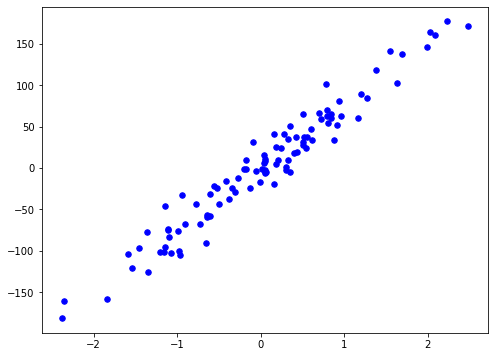

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y ,color='b',marker='o',s=30)
plt.show()

# ***Test the algorithm***

In [ ]:
#define mean squared error
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [ ]:
regressor = LinearRegression1(lr=0.005)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
y_predicted = regressor.predict(X_test)

In [ ]:
mse_value = mse(y_test,y_predicted)
mse_value

390.02303543076476

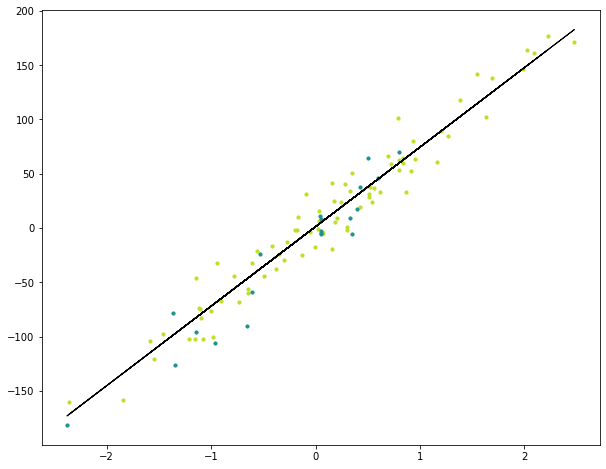

In [ ]:
#plot
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig=plt.figure(figsize=(10,8))
m1=plt.scatter(X_train, y_train,color=cmap(0.9),s=10)
m2=plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X,y_pred_line,color='black',linewidth=1,label='Prediction')
plt.show()